In [1]:
import PrepareData

# start_date="2021-03-12"
# last_date="2022-05-02"
# stock_name="Coupang"
# CPNG_train_set, CPNG_test_set,CPNG_only_stock_train_set, CPNG_only_stock_test_set=PrepareData.getPreaparedData(stock_name,start_date,last_date)

# start_date="2020-11-01"
# last_date="2022-05-02"
# stock_name="palantir"
# PLTR_train_set, PLTR_test_set,PLTR_only_stock_train_set, PLTR_only_stock_test_set=PrepareData.getPreaparedData(stock_name,start_date,last_date)


start_date="2016-01-01"
last_date="2022-05-24"
stock_name="Tesla"
TSLA_train_set, TSLA_test_set,TSLA_only_stock_train_set, TSLA_only_stock_test_set=PrepareData.getPreaparedData(stock_name,start_date,last_date)

In [7]:
TSLA_train_set.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'tw_count',
       'tw_pola', 'tw_subj', 'tw_n_pos', 'tw_n_neg', 'tw_ratio_pos',
       'tw_ratio_neg'],
      dtype='object')

In [2]:
train_data, target_data, test_train_data, test_target_data=PrepareData.makeLSTMDataSet(TSLA_train_set, TSLA_test_set)
only_stock_train_data, only_stock_target_data, only_stock_test_train_data, only_stock_test_target_data=PrepareData.makeLSTMDataSet(TSLA_only_stock_train_set, TSLA_only_stock_test_set)

In [3]:
import MakeLSTMModel

best_model=MakeLSTMModel.getBestModel(train_data,target_data,"recommend_stock")
best_model.fit(train_data, target_data, epochs = 1000, validation_data = (test_train_data, test_target_data))
best_model.save("best_model.h5")

INFO:tensorflow:Reloading Oracle from existing project model_store\recommend_stock\oracle.json
INFO:tensorflow:Reloading Tuner from model_store\recommend_stock\tuner0.json
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 82 and the optimal learning rate for the optimizer
    is 0.001.
    
Epoch 1/1000
35/35 [==============================] - 8s 52ms/step - loss: 11.8381 - val_loss: 17.4518
Epoch 2/1000
35/35 [==============================] - 0s 11ms/step - loss: 11.8107 - val_loss: 17.3926
Epoch 3/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.7804 - val_loss: 17.4100
Epoch 4/1000
35/35 [==============================] - 0s 11ms/step - loss: 11.7334 - val_loss: 17.3362
Epoch 5/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.6619 - val_loss: 17.3377
Epoch 6/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.6115 - val_

In [4]:
only_stock_best_model=MakeLSTMModel.getBestModel(only_stock_train_data,only_stock_target_data,"only_stock_recommend_stock")
only_stock_best_model.fit(only_stock_train_data, only_stock_target_data, epochs = 1000, validation_data = (only_stock_test_train_data, only_stock_test_target_data))
only_stock_best_model.save("only_stock_best_model.h5")

INFO:tensorflow:Reloading Oracle from existing project model_store\only_stock_recommend_stock\oracle.json
INFO:tensorflow:Reloading Tuner from model_store\only_stock_recommend_stock\tuner0.json
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 50 and the optimal learning rate for the optimizer
    is 0.01.
    
Epoch 1/1000
35/35 [==============================] - 2s 16ms/step - loss: 12.2993 - val_loss: 17.4171
Epoch 2/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.8321 - val_loss: 17.3218
Epoch 3/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.6729 - val_loss: 17.5098
Epoch 4/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.7628 - val_loss: 17.4401
Epoch 5/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.6571 - val_loss: 17.3344
Epoch 6/1000
35/35 [==============================] - 0s 4ms/step - loss

MSE Error is 26.628895213536673
52.09205020920502 %
239.35584561959155 $


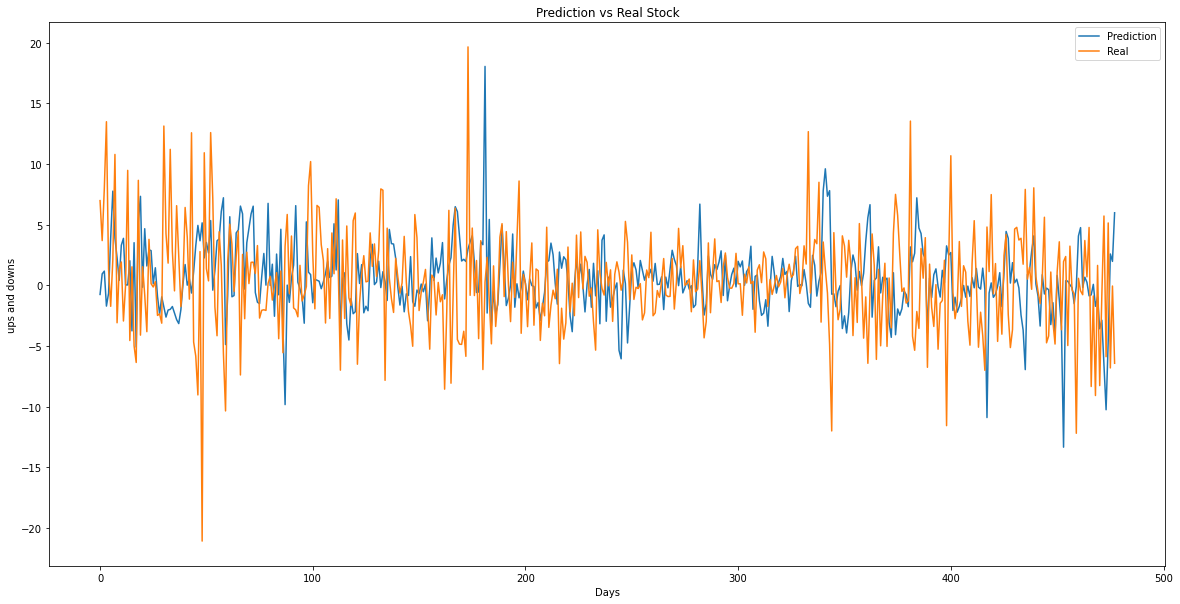

In [5]:
import EvalTool

EvalTool.printEval('best_model.h5',test_target_data, test_train_data)

MSE Error is 21.0010382087403
49.37238493723849 %
222.5267989462034 $


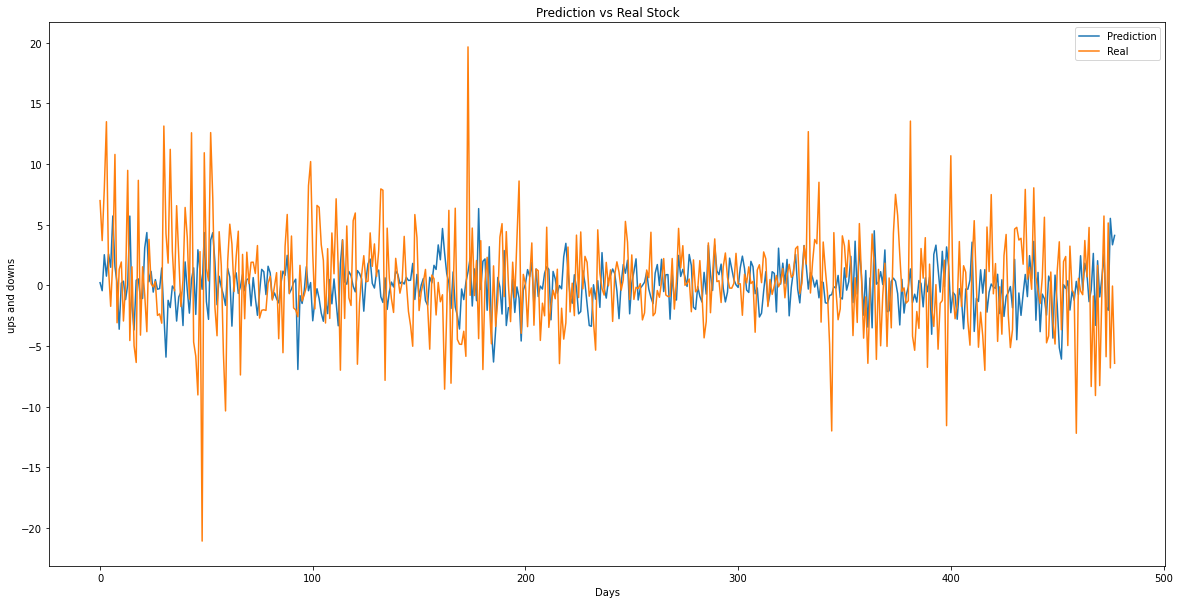

In [6]:

EvalTool.printEval('only_stock_best_model.h5',only_stock_test_target_data, only_stock_test_train_data)